In [1]:
probe_mapper = {'NP34_B2_0': 'P1-S1-P1',
                'NP34_B3_0': 'P1-S2-P1',
                'NP35_B2_0': 'P2-S1-P1',
                'NP66_B1_0': 'P3-S1-P1',
                'NP66_B1_1': 'P3-S1-P2',
                'NP66_B2_0': 'P3-S2-P1',
                'NP66_B2_1': 'P3-S2-P2',
                'NP86_B1_0': 'P4-S1-P1',
                'NP86_B1_1': 'P4-S1-P2',}

blk_mapper = {'NP34_B2': 'P1-S1',
                'NP34_B3': 'P1-S2',
                'NP35_B2': 'P2-S1',
                'NP86_B1': 'P4-S1',
                'NP66_B1': 'P3-S1',
                'NP66_B2': 'P3-S2',}


import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 6})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
import matplotlib.pyplot as plt
source_path = './source_data/FIG2/'

/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_13290/2876183831.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


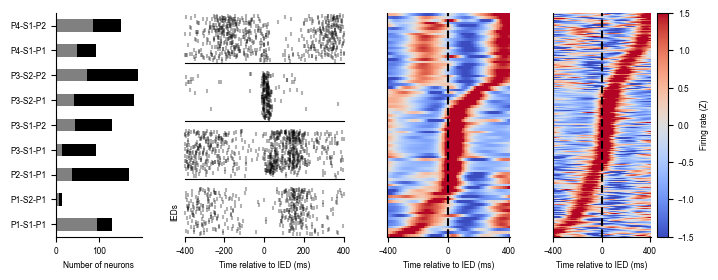

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# ===============================
# MASTER FIGURE
# ===============================
fig = plt.figure(figsize=(7, 2.6))
gs = GridSpec(1, 4, figure=fig, wspace=0.35,width_ratios=[0.7,1.3,1,1])
fig.subplots_adjust(left=0.065, right=0.95, top=0.98, bottom=0.12)

# ==========================================================
# PANEL 1 — MODULATION BAR PLOT 
# ==========================================================
ax1 = fig.add_subplot(gs[0])

d_plt = pd.read_csv(f'{source_path}/mod_counts.csv').iloc[:,1:]
d_plt = d_plt.sort_values(by=d_plt.columns[0])
d_plt.to_csv('./statistical_source/FIG2/panela.csv')

d_plt.plot(
    ax=ax1,
    kind='barh',
    stacked=True,
    color=['grey', 'black'],
    legend=False
)
ax1.set(
    xlabel='Number of neurons',
    yticklabels=[probe_mapper[c] for c in d_plt.column]
)

# ==========================================================
# PANEL 2 — 4×1 RASTERS 
# ==========================================================
data = np.load(
    f"{source_path}/rasters_for_column_timing_vars.npz",
    allow_pickle=True
)
selected_rasters = data["selected_rasters"]

gs_raster = GridSpecFromSubplotSpec(
    4, 1,
    subplot_spec=gs[1],
    hspace=0.15      # preserves vertical separation
)

axs_r = [fig.add_subplot(gs_raster[i]) for i in range(4)]

for i, r in enumerate(selected_rasters):
    ax = axs_r[i]
    for ind, tr in enumerate(r):
        ax.scatter(
            tr * 1000,
            np.repeat(ind, len(tr)),
            color='k',
            alpha=0.3,
            clip_on=False,
            marker='|',
            s = 9
        )

    ax.set_xlim([-400, 400])
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)

    if i != 3:
        ax.set_xticks([])              # EMPTY X AXES RESTORED
    else:
        ax.set_xlabel('Time relative to IED (ms)')
        ax.set_ylabel('IEDs')

# ==========================================================
# PANEL 3 — SINGLE COLUMN HEATMAP 
# ==========================================================
data = np.load(f'{source_path}/sample_single_col_timing_vars.npz', allow_pickle=True)
single_col = data['single_col']
t_ar = data['t_ar']

peak_timing = np.argsort(np.argmax(single_col, axis=1))

ax3 = fig.add_subplot(gs[2])
im = ax3.pcolormesh(
    t_ar,
    range(len(single_col)),
    single_col[peak_timing, :],
    cmap='coolwarm',
    vmin=-1.5,
    vmax=1.5,
    rasterized=True

)
ax3.set(
    yticks=[],
    xticks=[-400, 0, 400],
    xlabel='Time relative to IED (ms)'
)
ax3.axvline(0, color='k', linestyle='--')

# ==========================================================
# PANEL 4 — SORTED BY ACTIVITY TIME 
# ==========================================================
data = np.load(f'{source_path}/sorted_ied_vars.npz', allow_pickle=True)
norm_data = data['norm_data']
new_col_order = data['new_col_order']

t_ar = np.linspace(-400, 400, norm_data.shape[1])
peak_timing = np.argsort(np.argmax(norm_data, axis=1))

ax4 = fig.add_subplot(gs[3])
im = ax4.pcolormesh(
    t_ar,
    range(len(new_col_order)),
    norm_data[peak_timing, :],
    cmap='coolwarm',
    vmin=-1.5,
    vmax=1.5, 
    rasterized=True

)
fig.colorbar(im, ax=ax4, label='Firing rate (Z)')
ax4.set(
    yticks=[],
    xticks=[-400, 0, 400],
    xlabel='Time relative to IED (ms)'
)
ax4.axvline(0, color='k', linestyle='--')

# ===============================
# SAVE
# ===============================
#plt.savefig('./current_composite_plots/first_row.pdf', dpi=800, transparent=True)

plt.show()


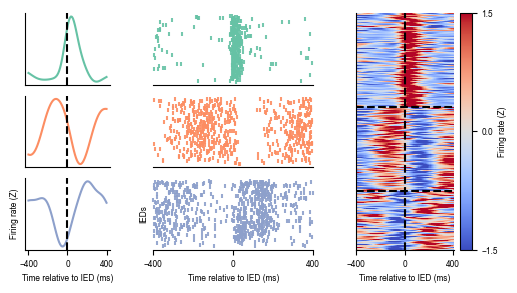

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# =========================
# MASTER FIGURE
# =========================
fig = plt.figure(figsize=(7, 2.75))
gs = GridSpec(1, 4, figure=fig, wspace=0.35,width_ratios=[0.7,1.3,1,1])
#fig.subplots_adjust(left=0.025, right=0.95, top=0.98, bottom=0.12)
fig.subplots_adjust(left=0.065, right=0.95, top=0.98, bottom=0.12)

# ============================================================
# PANEL 1 — COMPONENTS 
# ============================================================
data = np.load(f'{source_path}/components_vars.npz', allow_pickle=True)
clusters = data['clusters']
t_ar = data['t_ar']
n_clus = int(data['n_clus'])

comp_palette = sns.color_palette('Set2')

gs_comp = GridSpecFromSubplotSpec(
    n_clus, 1,
    subplot_spec=gs[0],
    hspace=0.15
)

axs_comp = [fig.add_subplot(gs_comp[i]) for i in range(n_clus)]

for i, c in enumerate(clusters):
    ax = axs_comp[i]
    ax.plot(t_ar, c, color=comp_palette[i], linewidth=1.5)
    ax.axvline(0, color='k', linestyle='--')

    if i == n_clus - 1:
        ax.set(
            xticks=[-400, 0, 400],
            yticks=[],
            ylabel='Firing rate (Z)',
            xlabel='Time relative to IED (ms)'
        )
    else:
        ax.set(xticks=[], yticks=[], ylabel='')

# ============================================================
# PANEL 2 — RASTERS
# ============================================================
data = np.load(f'{source_path}/rasters_for_column_vars.npz', allow_pickle=True)
target_rasters = data['target_rasters']
comp_palette = data['comp_palette']

gs_raster = GridSpecFromSubplotSpec(
    3, 1,
    subplot_spec=gs[1],
    hspace=0.15
)

axs_r = [fig.add_subplot(gs_raster[i]) for i in range(3)]

for i, r in enumerate(target_rasters):
    ax = axs_r[i]
    for ind, tr in enumerate(r):
        ax.scatter(
            tr * 1000,
            np.repeat(ind, len(tr)),
            color=comp_palette[i],
            alpha=0.9,
            clip_on=False,
            marker='|', s = 9
        )

    ax.set_xlim([-400, 400])
    ax.set_xticks([-400, 0, 400])

    ax.set_yticks([])
    ax.spines['left'].set_visible(False)

    if i != 2:
        ax.set_xticks([])
    else:
        ax.set_xlabel('Time relative to IED (ms)')
        ax.set_ylabel('IEDs')

# ============================================================
# PANEL 3 — SORTED BY NMF CLUSTER 
# ============================================================
data = np.load(f'{source_path}/sorted_nmf_cluster_vars.npz', allow_pickle=True)
norm_data = data['norm_data']
new_col_order = data['new_col_order']
clus_preds = data['clus_preds']
t_ar = data['t_ar']

clustered_order = np.argsort(clus_preds)

ax3 = fig.add_subplot(gs[2])
im = ax3.pcolormesh(
    t_ar,
    range(len(new_col_order)),
    norm_data[clustered_order, :],
    cmap='coolwarm',
    vmin=-1.5,
    vmax=1.5,
    rasterized=True
)

fig.colorbar(im, ax=ax3,ticks=[-1.5,0,1.5]).set_label('Firing rate (Z)', labelpad=0)

ax3.set(
    yticks=[],
    xticks=[-400, 0, 400],
    xlabel='Time relative to IED (ms)'
)
ax3.axvline(0, color='k', linestyle='--')
ax3.invert_yaxis()

for x in np.where(np.diff(clus_preds[clustered_order]) > 0)[0]:
    ax3.axhline(x, color='k', linestyle='--')

# =========================
# SAVE
# =========================
#plt.savefig('./current_composite_plots/second_row.pdf', dpi=800, transparent=True)

plt.show()


/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_13290/3532519847.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_13290/3532519847.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_13290/3532519847.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_13290/3532519847.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

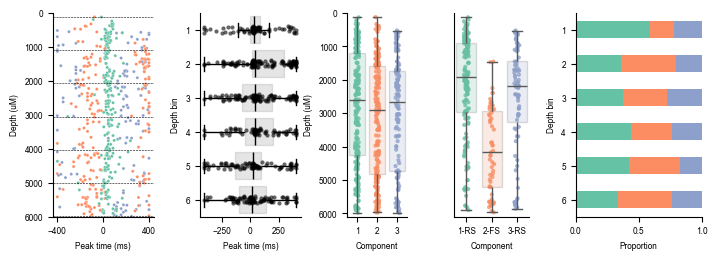

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------
# FIGURE LAYOUT (1 x 5, same vertical scale as originals)
# -------------------------------------------------
fig, axs = plt.subplots(
    1, 5,
    figsize=(7, 2.4),   # 5 × ~1.5 in wide, 3 in tall
    gridspec_kw=dict(wspace=0.5),
    width_ratios=[1,1,0.6,0.75,1.25]
)
#fig.subplots_adjust(left=0.06, right=0.995, top=0.98, bottom=0.12)
fig.subplots_adjust(left=0.065, right=0.992, top=0.98, bottom=0.13)


# =================================================
# PANEL 1 — Depth vs peak time (scatter)
# =================================================
data = np.load(f'{source_path}/depth_peak_time_vars.npz', allow_pickle=True)
df = pd.DataFrame(data['df'], columns=data['columns'])
bins = data['bins']
df.to_csv('./statistical_source/FIG2/panelj.csv')

ax = axs[0]
sns.scatterplot(
    data=df,
    y='depth',
    x='peak_t',
    hue='k_mean_cluster',
    palette='Set2',
    s=5,
    legend=None,
    ax=ax
)

ax.invert_yaxis()
ax.set(xticks=[-400, 0, 400],ylim=[6000,0])
for b in bins:
    ax.axhline(b, color='k', linestyle='--', linewidth=0.4)

ax.set(xlabel='Peak time (ms)', ylabel='Depth (uM)')


# =================================================
# PANEL 2 — Depth bins vs peak time (box + strip)
# =================================================
data = np.load(f'{source_path}/depth_peak_time_bins_vars.npz', allow_pickle=True)
df_sua = pd.DataFrame(data['df'], columns=data['columns'])
df_sua.depth_bin = df_sua.depth_bin.astype(int)
df_sua.to_csv('./statistical_source/FIG2/panelk.csv')

ax = axs[1]
sns.boxplot(
    ax=ax,
    data=df_sua,
    x='peak_t',
    y='depth_bin',
    orient='h',
    color='k',
    boxprops=dict(alpha=0.1),
    fliersize=0
)

sns.stripplot(
    ax=ax,
    data=df_sua,
    x='peak_t',
    y='depth_bin',
    orient='h',
    color='k',
    s=3,
    alpha=0.6,
    zorder=-1000
)

ax.set(xlabel='Peak time (ms)', ylabel='Depth bin')
df_time_box = df_sua.copy()

# =================================================
# PANEL 3 — Depth vs k-means cluster
# =================================================
data = np.load(f'{source_path}/depth_kmean_clus_vars.npz', allow_pickle=True)
df_sua = pd.DataFrame(data['df'], columns=data['columns'])
df_sua.to_csv('./statistical_source/FIG2/panell_left.csv')

ax = axs[2]
sns.boxplot(
    ax=ax,
    data=df_sua,
    y='depth',
    x='k_mean_cluster',
    palette='Set2',
    boxprops={'alpha': 0.2}
)

sns.stripplot(
    ax=ax,
    data=df_sua,
    y='depth',
    x='k_mean_cluster',
    palette='Set2',
    s=3,
    alpha=0.8,
    zorder=-1000
)

ax.set(
    xlabel='Component',
    xticklabels=[1, 2, 3],
    ylabel='Depth (uM)',
    ylim=[-10, 6100]
)
ax.invert_yaxis()


# =================================================
# PANEL 4 — Depth vs k-means cluster (cell type)
# =================================================
data = np.load(f'{source_path}/depth_kmean_clus_celltype_vars.npz', allow_pickle=True)
df_pruned = pd.DataFrame(data['df'], columns=data['columns'])
depth_cutoff = data['depth_cutoff'].item()
df_pruned.to_csv('./statistical_source/FIG2/panell_right.csv')

ax = axs[3]
sns.boxplot(
    ax=ax,
    data=df_pruned,
    y='depth',
    x='k_mean_cluster',
    palette='Set2',
    boxprops={'alpha': 0.2}
)

sns.stripplot(
    ax=ax,
    data=df_pruned,
    y='depth',
    x='k_mean_cluster',
    palette='Set2',
    s=3,
    alpha=0.8,
    zorder=-1000
)

ax.set(
    xlabel='Component',
    xticklabels=['1-RS', '2-FS', '3-RS'],
    ylim=[-10, depth_cutoff + 100],
    yticks=[],
    ylabel=''
)
ax.invert_yaxis()


# =================================================
# PANEL 5 — Cluster depth proportions (stacked barh)
# =================================================
depth_clus_summary = pd.read_csv(
    f'{source_path}/clus_depth_df.csv'
).iloc[:, 2:]
depth_clus_summary.to_csv('./statistical_source/FIG2/panelm.csv')

ax = axs[4]
depth_clus_summary.plot(
    ax=ax,
    kind='barh',
    stacked=True,
    color=sns.color_palette('Set2'),
    legend=None
)

ax.set(
    ylabel='Depth bin',
    xlabel='Proportion',
    yticklabels=range(1, 7),
    xlim=[0,1],xticks=[0,0.5,1]
)
ax.invert_yaxis()


# -------------------------------------------------
# SAVE (publication-ready)
# -------------------------------------------------
# fig.savefig(
#     './current_composite_plots/last_row.pdf',
#     dpi=800
# )

plt.show()


In [5]:
from scipy.stats import ranksums,mannwhitneyu,ttest_ind
from statsmodels.stats.multitest import multipletests
ps = []
for i in range(6):
    for j in range(6):
        if i == j : continue
        st, p = ranksums(df_time_box[df_time_box.depth_bin == i+1].peak_t,
                 df_time_box[df_time_box.depth_bin == j+1].peak_t)
        ps.append(p)
print(multipletests(ps,method='holm'))


for i in range(6):
    print(np.sum(df_time_box.depth_bin == i+1))


(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False]), array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.13631567, 0.20657355,
       1.        , 1.        , 1.        , 0.96961026, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.13631567, 0.96961026, 1.        , 1.        ,
       1.        , 0.20657355, 1.        , 1.        , 1.        ]), 0.0017083156444657188, 0.0016666666666666668)
83
122
103
68
87
92


In [6]:
from scipy.stats import ranksums,mannwhitneyu,ttest_ind
ranksums(df[df.k_mean_cluster == 2].depth,
         df_sua[df.k_mean_cluster == 1].depth)


RanksumsResult(statistic=2.4285508300795953, pvalue=0.015159299991704922)

In [7]:
from scipy.stats import ranksums,mannwhitneyu,ttest_ind
ranksums(df_sua[df.k_mean_cluster == 2].depth,
         df_sua[df.k_mean_cluster == 1].depth)
print(np.sum(df.k_mean_cluster ==1))
print(np.sum(df.k_mean_cluster ==2))
print(np.sum(df.k_mean_cluster ==3))

230
201
124


In [8]:
from scipy.stats import ranksums,mannwhitneyu,ttest_ind
ranksums(df_pruned[df_pruned.k_mean_cluster == 2].depth,
         df_pruned[df_pruned.k_mean_cluster == 1].depth)

RanksumsResult(statistic=7.5218280678993334, pvalue=5.4015588314431133e-14)

In [9]:
print(ranksums(df_pruned[df_pruned.k_mean_cluster == 2].depth,
         df_pruned[df_pruned.k_mean_cluster == 3].depth))
print(np.sum(df_pruned.k_mean_cluster ==1))
print(np.sum(df_pruned.k_mean_cluster ==2))
print(np.sum(df_pruned.k_mean_cluster ==3))

RanksumsResult(statistic=5.822729774330222, pvalue=5.789412290921232e-09)
158
58
84


In [10]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([49, 44])#, 18])
nobs = np.array([83,122])#,124])
stat, pval = proportions_ztest(count, nobs)
print(stat,pval)

3.242777819412374 0.0011837047990153992


In [11]:
depth_clus_summary

,1,2,3
0,0.590361,0.192771,0.216867
1,0.360656,0.434426,0.204918
2,0.378641,0.349515,0.271845
3,0.441176,0.323529,0.235294
4,0.425287,0.402299,0.172414
5,0.336957,0.423913,0.239130


/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_13290/608973787.py:23: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.0, right=0.999, top=0.98, bottom=0.10)


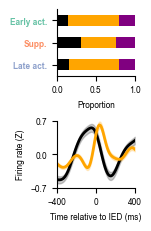

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem

# ===== LOAD VARIABLES =====
# Waveform bar plot
data_wv = np.load(f'{source_path}/wv_types_barh_vars.npz', allow_pickle=True)
d_wv_bar = pd.DataFrame(data_wv['d_wv_bar'].item())
cols = data_wv['cols']

# RS/FS firing rate
data_fs = np.load(f'{source_path}/rs_fs_vars.npz', allow_pickle=True)
norm_data = data_fs['norm_data']
wvs = data_fs['wvs']
t_ar = data_fs['t_ar']

pal = sns.color_palette('Set2').as_hex()

# ===== CREATE 2x1 SUBPLOT =====
fig, axs = plt.subplots(2, 1, figsize=(1.4, 2.2), constrained_layout=True)
fig.subplots_adjust(left=0.0, right=0.999, top=0.98, bottom=0.10)

# ---- PANEL 1: Waveform bar ----
ax = axs[0]
d_wv_bar.plot(ax=ax, kind='barh', stacked=True, color=cols[[0,2,1]], legend=None)
ax.set(ylabel='', xticks=ax.get_xticks(), xlim=[0, 1],
       yticklabels=['Early act.', 'Supp.', 'Late act.'], xlabel='Proportion')
ax.invert_yaxis()
for tick, color in zip(ax.get_yticklabels(), sns.color_palette('Set2').as_hex()):
    tick.set_color(color)
    tick.set_fontweight('bold')
d_wv_bar.to_csv('./statistical_source/FIG2/panelh.csv')

# ---- PANEL 2: RS/FS firing rate ----
ax = axs[1]

# FS
sig = norm_data[wvs == 'FS'].mean(0)
error = sem(norm_data[wvs == 'FS'], axis=0)
ax.plot(t_ar, sig, color='k', linewidth=2)
ax.fill_between(t_ar, sig - error, sig + error, color='k', alpha=0.2)

# RS
sig = norm_data[wvs == 'RS'].mean(0)
error = sem(norm_data[wvs == 'RS'], axis=0)
ax.plot(t_ar, sig, color='orange', linewidth=2)
ax.fill_between(t_ar, sig - error, sig + error, color='orange', alpha=0.2)

# Optional: Other
# sig = norm_data[wvs == 'Other'].mean(0)
# error = sem(norm_data[wvs == 'Other'], axis=0)
# ax.plot(t_ar, sig, color='purple', linewidth=2)
# ax.fill_between(t_ar, sig - error, sig + error, color='purple', alpha=0.2)

ax.set(xticks=[-400, 0, 400], xlim=[-400, 400],yticks=[-0.7,0,0.7],ylim=[-0.7,0.7],
       xlabel='Time relative to IED (ms)', ylabel='Firing rate (Z)')

# fig.savefig(
#     './current_composite_plots/wvtype.pdf',
#     dpi=800
# )

plt.show()
